In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df=pd.read_csv(r"C:\Users\koliv\downloads\final_data_6105.csv")
df.head()

,Unnamed: 0,acct_age,favourites_count,followers_count,following,friends_count,id,in_reply_to_user_id,lang,name,num_hashtags,num_mentions,num_urls,retweet_count,statuses_count,user_type,verified
0,3,0.690280,0.325147,0.002278,NaN,0.039731,191839658,0.145937,en,pocahontas farida,0.023177,0.305854,0.097820,0.104106,0.608592,1,0.0
1,5,0.426396,0.008454,0.000650,NaN,0.043174,2157382005,0.220953,en,JO,0.036912,0.462550,0.115661,0.002666,0.038725,1,0.0
2,6,0.431029,0.102509,0.001056,NaN,0.081001,1947320929,0.040046,en,❄McKayla❄,0.060868,0.383332,0.087200,0.527673,0.041007,1,0.0
3,8,0.438640,0.007586,0.000341,NaN,0.010368,1733095801,0.036730,en,Nicole Romany,0.103199,0.198605,0.176801,0.000979,0.014555,1,0.0
4,12,0.822222,0.000016,0.001974,NaN,0.084889,21959183,0.044361,en,Randee Deason,0.082895,0.218627,0.207693,0.002465,0.031046,1,0.0


In [62]:
del df['Unnamed: 0']
del df['name']
del df['lang']

In [63]:
df.shape

(2099, 14)

In [64]:
df.isnull().sum()

acct_age                  0
favourites_count          0
followers_count           0
following              1083
friends_count             0
id                        0
in_reply_to_user_id       0
num_hashtags              0
num_mentions              0
num_urls                  0
retweet_count             0
statuses_count            0
user_type                 0
verified                  0
dtype: int64

In [65]:
df = df.fillna(0)

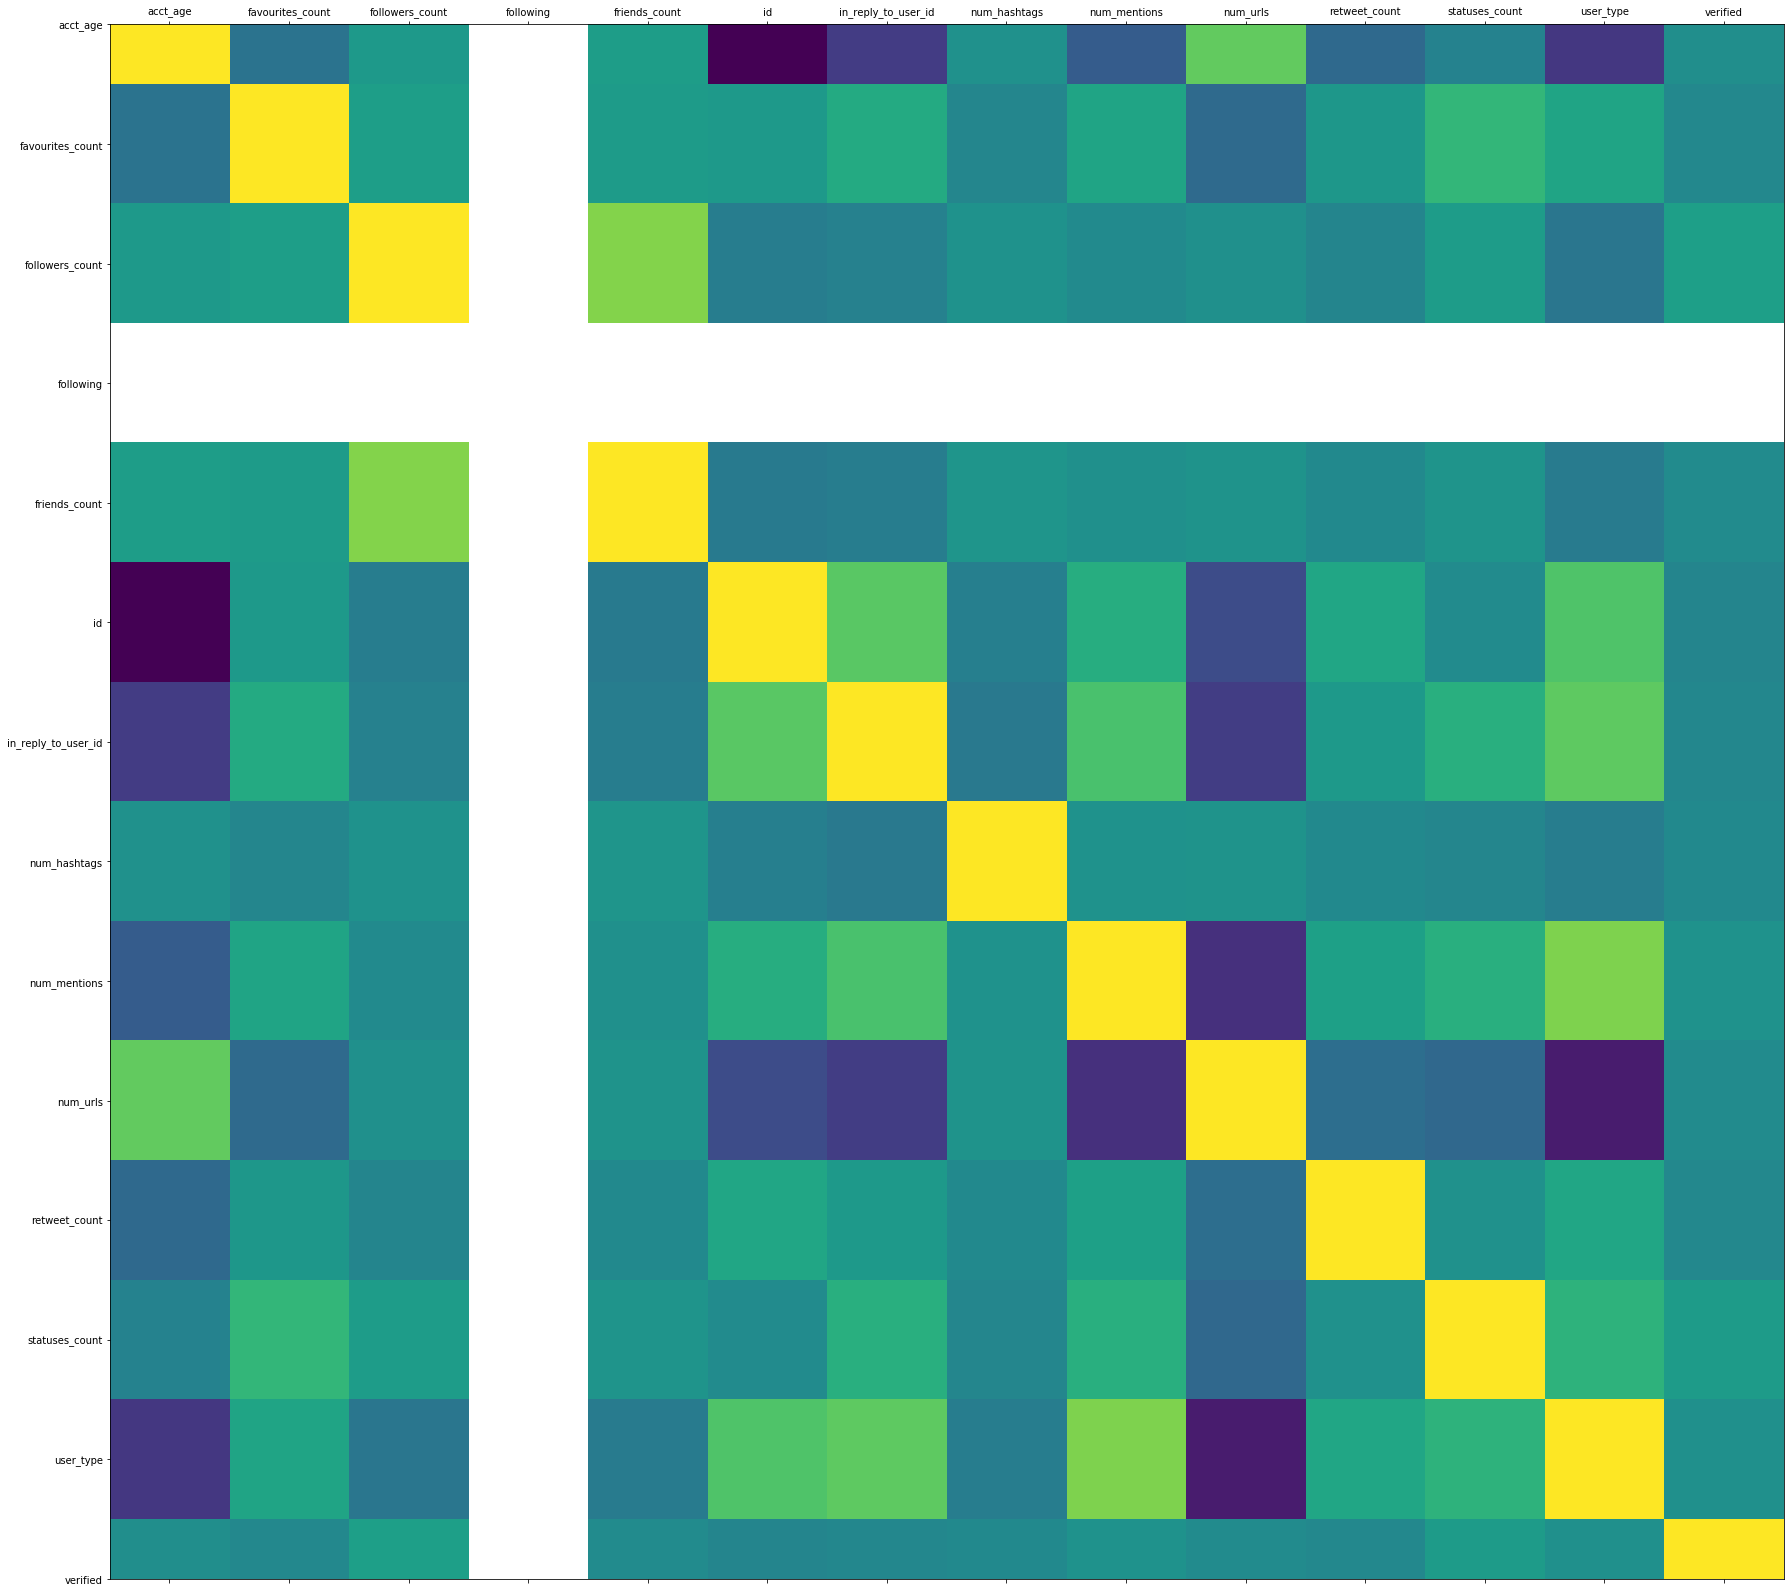

In [66]:
def plot_corr(df, size=30):
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

In [68]:
# Create X
X = df.loc[:, df.columns != 'user_type']
print(X)

      acct_age  favourites_count  followers_count  following  friends_count  \
0     0.690280          0.325147         0.002278        0.0       0.039731   
1     0.426396          0.008454         0.000650        0.0       0.043174   
2     0.431029          0.102509         0.001056        0.0       0.081001   
3     0.438640          0.007586         0.000341        0.0       0.010368   
4     0.822222          0.000016         0.001974        0.0       0.084889   
...        ...               ...              ...        ...            ...   
2094  0.766914          0.000000         0.002254        0.0       0.011042   
2095  0.766832          0.000000         0.012386        0.0       0.014346   
2096  0.766804          0.000000         0.115686        0.0       0.136709   
2097  0.766803          0.000000         0.087545        0.0       0.113059   
2098  0.764207          0.000000         0.012014        0.0       0.038865   

              id  in_reply_to_user_id  num_hashtags

In [69]:
# Create Y
y = df.user_type.values.reshape(2099,1);

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X_scale = scaling.transform(X)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y.ravel(), test_size=0.3, random_state=0)

In [72]:
X_train.shape

(1469, 13)

In [73]:
#Perform Random forest
modelRandom = RandomForestClassifier(max_depth=3, n_estimators=100)
modelRandom.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
print(modelRandom.score(X_test, y_test))
print(modelRandom.score(X_train, y_train))

0.9952380952380953
0.9945541184479237


In [75]:
# Cross Validation

X = df.loc[:, df.columns != 'user_type']
y = np.array(df['user_type'])
modelRandomCV=cross_val_score(modelRandom, X, y, cv = 20)

In [76]:
modelRandom

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

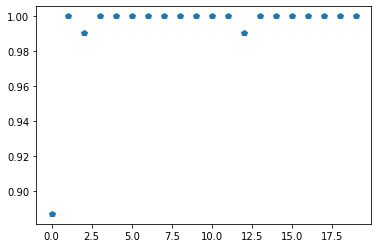

In [77]:
plt.plot(modelRandomCV,"p")

In [78]:
#mean model accuracy of all five loads
print(modelRandomCV.mean())


0.9933917340521115


In [79]:
modelRandom = RandomForestClassifier(max_depth=3, n_estimators=100)
modelRandom.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
# Predict using the model
predictions=modelRandom.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [81]:
predict_train = modelRandom.predict(X_train)
predict_test = modelRandom.predict(X_test)


In [25]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train.ravel(), predict_train)
cm_test = confusion_matrix(y_test.ravel(), predict_test)
print('Training Accuracy: \n', cm_train)
print('')
print('Testing Accuracy: \n', cm_test)

Training Accuracy: 
 [[714   2]
 [740  13]]

Testing Accuracy: 
 [[300   0]
 [327   3]]


Text(0.5, 1, 'Training Accuracy')

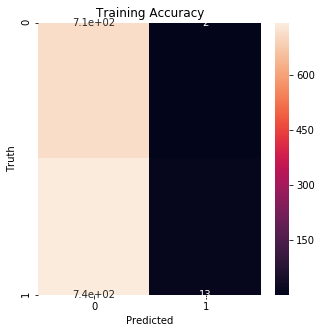

In [26]:

import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_train, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Training Accuracy')


In [31]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

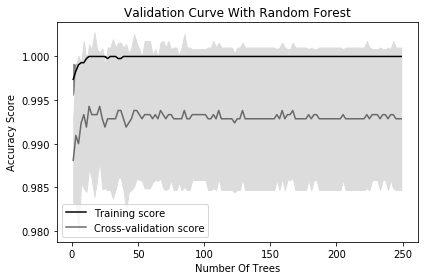

In [40]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Implementing PCA

In [47]:
# Implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2099, 13)
transformed shape: (2099, 3)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

In [49]:
X_train.shape

(1469, 3)

In [50]:
#Perform Random forest
modelRandom = RandomForestClassifier(max_depth=3, n_estimators=100)
modelRandom.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
print(modelRandom.score(X_test, y_test))
print(modelRandom.score(X_train, y_train))

0.9253968253968254
0.9223961878829136


In [53]:
# Cross Validation

X = df.loc[:, df.columns != 'user_type']
y = np.array(df['user_type'])
modelRandomCV=cross_val_score(modelRandom, X, y, cv = 20)

In [54]:
modelRandom

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

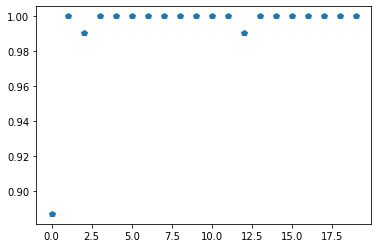

In [55]:
plt.plot(modelRandomCV,"p")

In [56]:
#mean model accuracy of all five loads
print(modelRandomCV.mean())


0.9933917340521115


In [57]:
modelRandom = RandomForestClassifier(max_depth=3, n_estimators=100)
modelRandom.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
# Predict using the model
predictions=modelRandom.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
predict_train = modelRandom.predict(X_train)
predict_test = modelRandom.predict(X_test)


In [84]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train.ravel(), predict_train)
cm_test = confusion_matrix(y_test.ravel(), predict_test)
print('Training Accuracy: \n', cm_train)
print('')
print('Testing Accuracy: \n', cm_test)

Training Accuracy: 
 [[709   7]
 [737  16]]

Testing Accuracy: 
 [[299   1]
 [325   5]]


Text(0.5, 1, 'Training Accuracy')

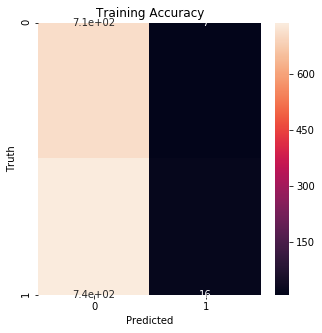

In [85]:

import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_train, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Training Accuracy')


In [86]:
#For plotting Validation Curve

from sklearn.model_selection import validation_curve

param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

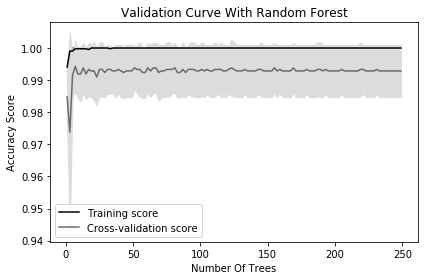

In [87]:
# Function to plot data


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()